In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

In [11]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
len(X_train)

60000

In [13]:
len(X_test)

10000

In [14]:
X_train[(x:=random.randint(0, len(X_train) - 1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
X_train = X_train / 255 # scaling dataset form (0, 255) -> (0, 1)
X_test = X_test / 255

In [16]:
X_train[x]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

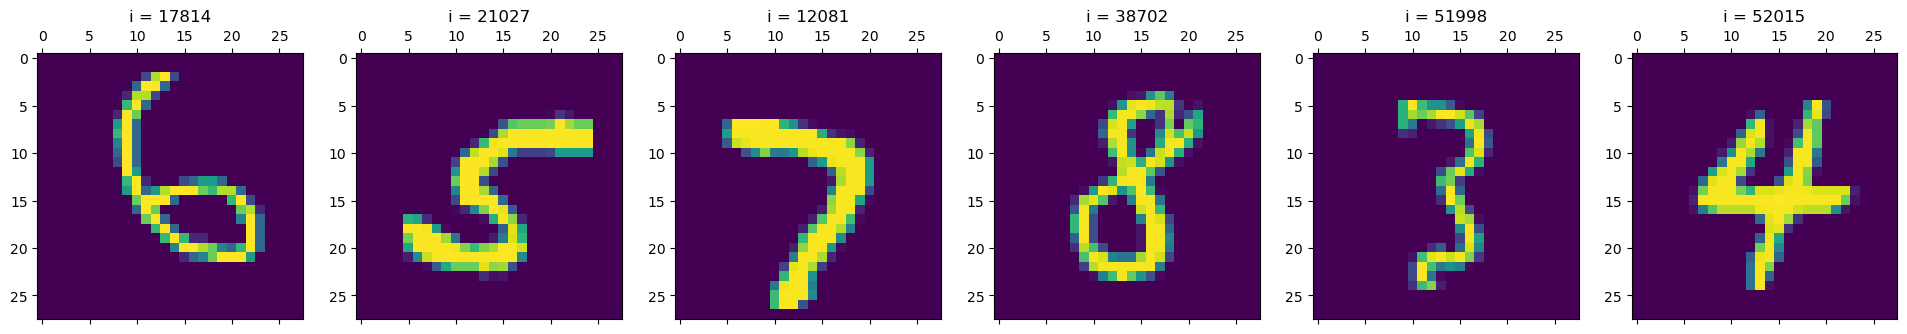

In [17]:
fig = plt.figure(figsize=(24, 4)) 
gs = fig.add_gridspec(1, 6)  
for a in range(6):
    ax = fig.add_subplot(gs[0,a])
    ax.set_title('i = ' + str(i := random.randint(0, len(X_train) - 1)))
    ax.matshow(X_train[i])

In [18]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train_flattend = X_train.reshape(len(X_train), 784) # 28 * 28 = 784 converting from 2d array to 1d array
X_train_flattend.shape

(60000, 784)

In [21]:
X_test_flattend = X_test.reshape(len(X_test), 784) # 28 * 28 = 784 converting from 2d array to 1d array
X_test_flattend.shape

(10000, 784)

In [22]:
print("Train Data No. =", j := random.randint(0, len(X_train)-1))
X_train_flattend[j]

Train Data No. = 3490


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

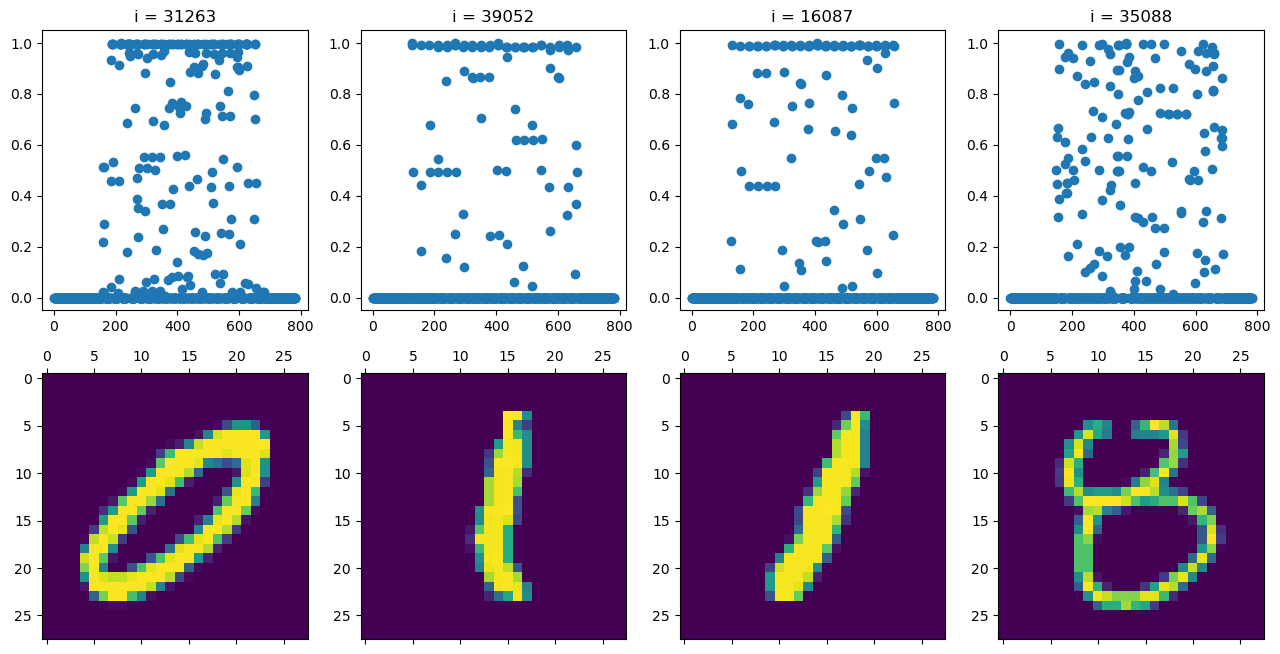

In [23]:
fig = plt.figure(figsize=(24, 8)) 
gs = fig.add_gridspec(2, 6)  

bins = range(X_train_flattend.shape[1])

for a in range(4):
    ax = fig.add_subplot(gs[0, a])    
    ay = fig.add_subplot(gs[1, a])    

    ax.set_title('i = ' + str(i := random.randint(0, len(X_train) - 1)))
    ax.scatter(bins, X_train_flattend[i])
    ay.matshow(X_train[i])

<img src="digits_nn.jpg" />

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattend, y_train, epochs = 5)

2023-05-28 23:43:51.782837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-28 23:43:51.836149: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-28 23:43:51.836217: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-28 23:43:51.837614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them i

Epoch 1/5


2023-05-28 23:43:54.541887: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-28 23:43:54.545462: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f4f4ee3ba10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-28 23:43:54.545546: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-05-28 23:43:54.550596: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-28 23:43:54.822961: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-28 23:43:54.941501: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged

1875/1875 [==============================] - 8s 3ms/step - loss: 0.4637 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3033 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2828 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2735 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2664 - accuracy: 0.9261


In [25]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2680 - accuracy: 0.9250


[0.26804590225219727, 0.925000011920929]

In [29]:
y_predicted = model.predict(X_test_flattend)
y_predicted.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

Output (3067) = [6.2496816e-03 7.4234146e-07 1.0231830e-01 7.7626071e-05 2.3749325e-04
 8.9546613e-02 9.9953878e-01 8.9187120e-09 2.0781178e-03 4.0491733e-07]
Predicted Number = 6 with prediction % = 99.9538779258728


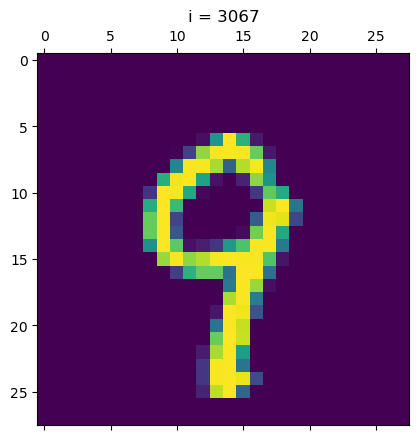

In [58]:
plt.matshow(X_test[i])
plt.title('i = ' + str(i := random.randint(0, len(X_test) - 1)))
print('Output (' + str(i) + ') = ' + str(y_predicted[i]))
predictedNum, predictionPercentage = np.argmax(y_predicted[i]), max(y_predicted[i]) * 100
print(f'Predicted Number = {predictedNum} with prediction % = {predictionPercentage}')